In [5]:
from ctgan import CTGAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load your dataset
original_data = pd.read_csv('diabetic_data.csv')

# Preprocessing
data = original_data.drop(columns=["encounter_id", "patient_nbr"])
categorical_columns = data.select_dtypes(include=["object"]).columns
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Train CTGAN
ctgan = CTGAN(
    epochs=200,
    
    generator_dim=(256, 256),
    discriminator_dim=(256, 256),


)
#verbose=True pac=10 batch_size=1024,
ctgan.fit(train_data, discrete_columns=list(categorical_columns))

# Generate synthetic data
synthetic_data = ctgan.sample(len(test_data))



ModuleNotFoundError: No module named 'ctgan'

In [ ]:
# Membership Inference Attack
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Create labels for membership: 1 for training data, 0 for synthetic
train_data["membership"] = 1
synthetic_data["membership"] = 0

# Combine and shuffle
combined_data = pd.concat([train_data, synthetic_data]).sample(frac=1, random_state=42)
X = combined_data.drop(columns=["membership"])
y = combined_data["membership"]

# Split for attack model
X_train, X_attack, y_train, y_attack = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a simple attack model
attack_model = RandomForestClassifier(random_state=42)
attack_model.fit(X_train, y_train)

# Evaluate the attack
y_pred = attack_model.predict(X_attack)
attack_results = {
    "accuracy": accuracy_score(y_attack, y_pred),
    "precision": precision_score(y_attack, y_pred),
    "recall": recall_score(y_attack, y_pred)
}

print("Attack Results:", attack_results)

In [3]:
synthetic_data.shape

NameError: name 'synthetic_data' is not defined

In [9]:
synthetic_data.to_csv('synthetic_data.csv', index=False)

In [11]:
synthetic_data.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,membership
0,3,0,8,1,1,1,7,6,8,0,...,1,1,0,0,0,0,0,1,2,0
1,3,1,3,1,3,1,1,8,8,63,...,0,1,0,0,0,0,0,1,2,0
2,3,1,5,1,1,1,7,4,0,0,...,2,1,0,0,0,0,1,1,2,0
3,3,0,6,1,1,18,7,3,0,0,...,0,1,0,0,0,0,1,1,2,0
4,1,0,6,1,1,1,7,5,8,19,...,1,1,0,0,0,0,1,1,1,0


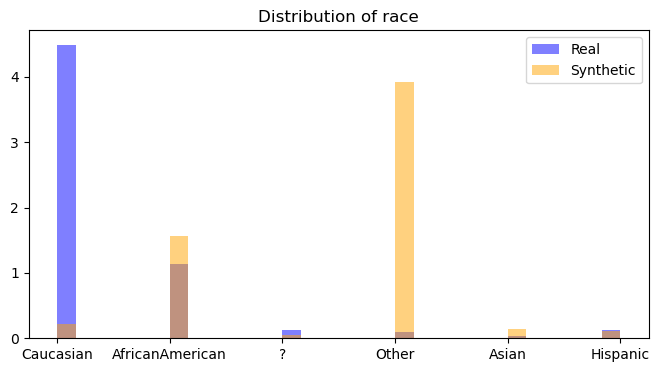

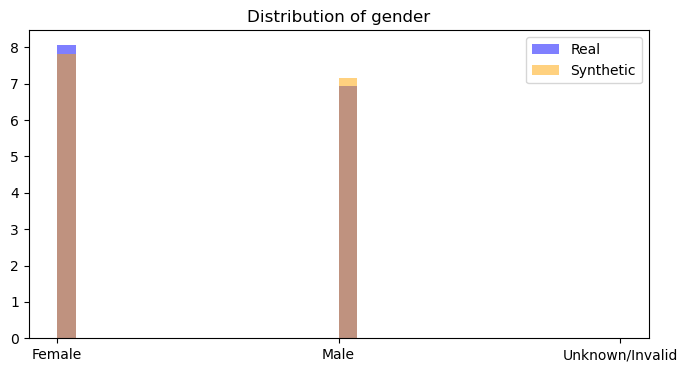

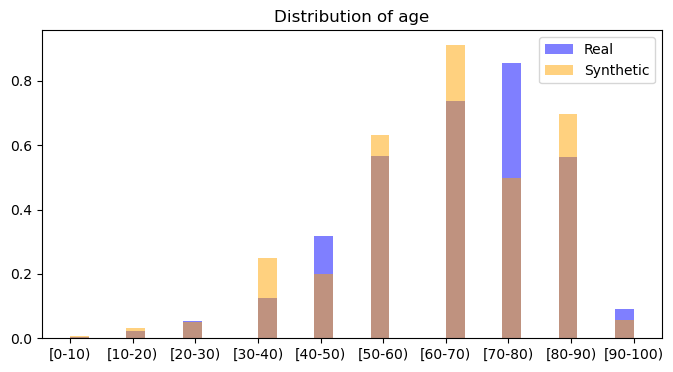

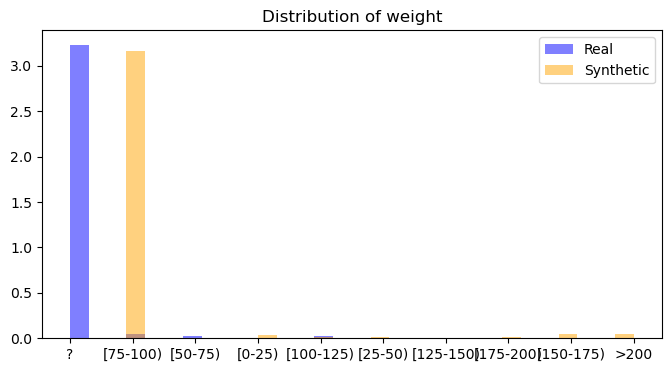

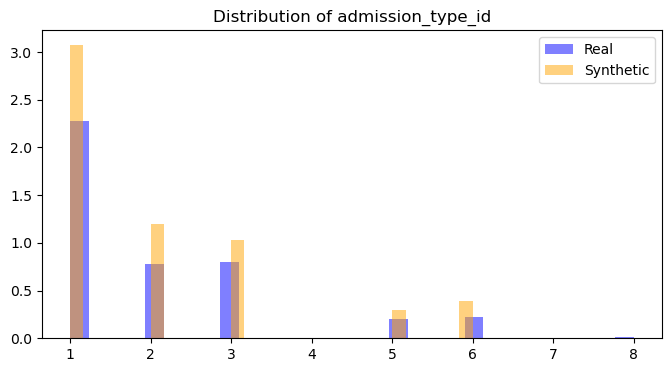

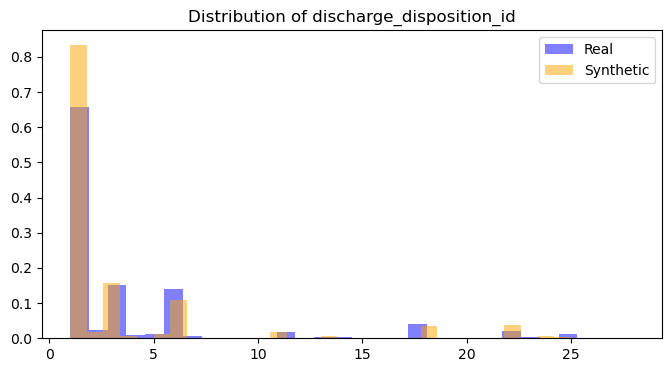

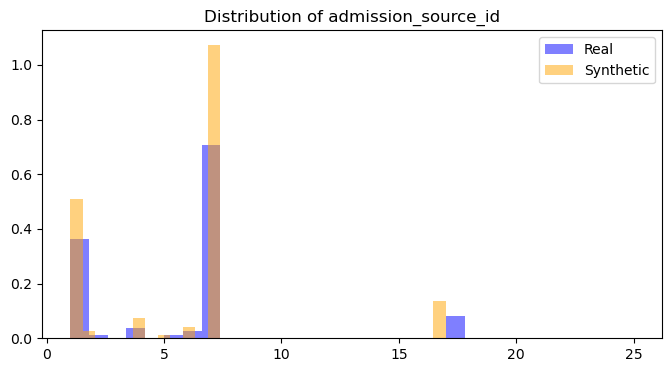

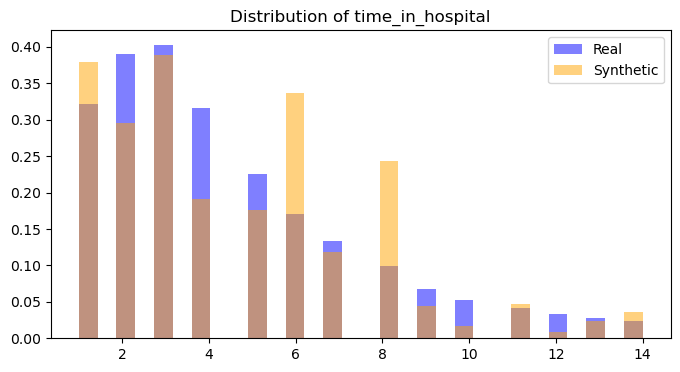

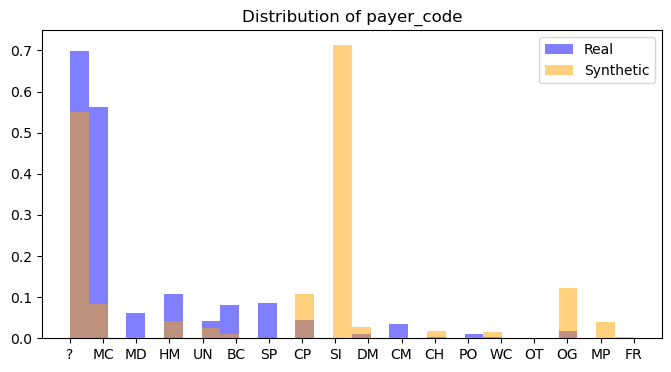

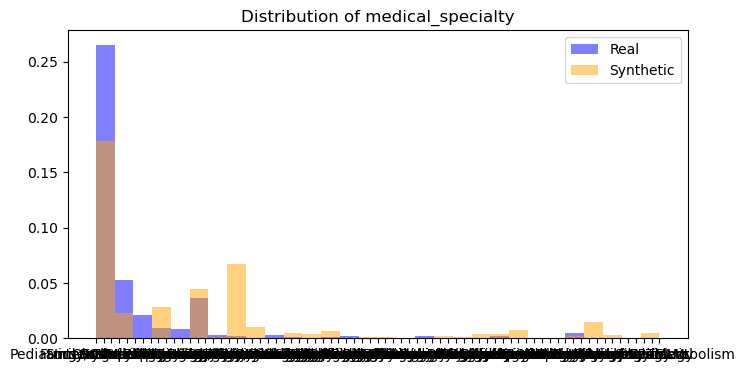

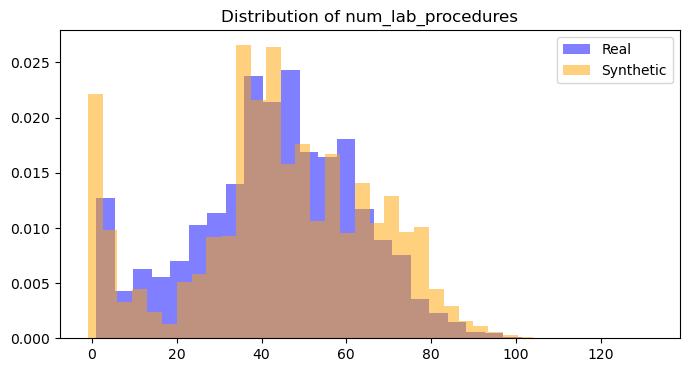

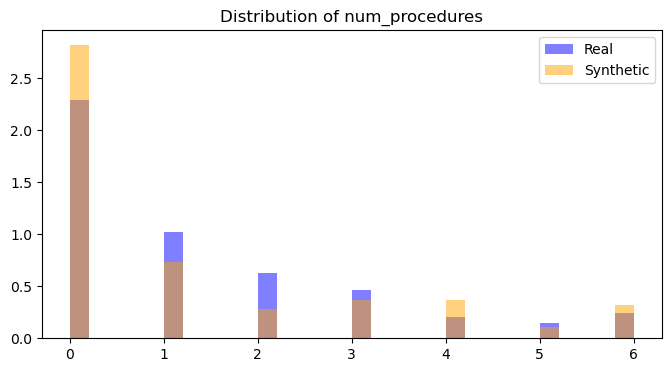

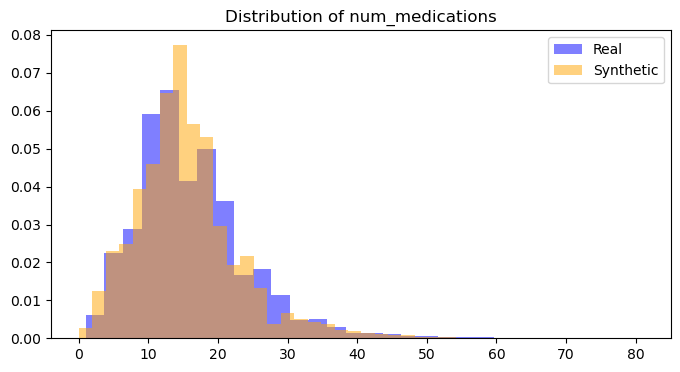

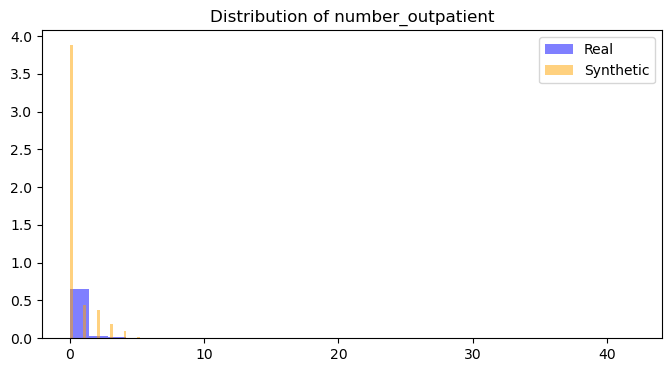

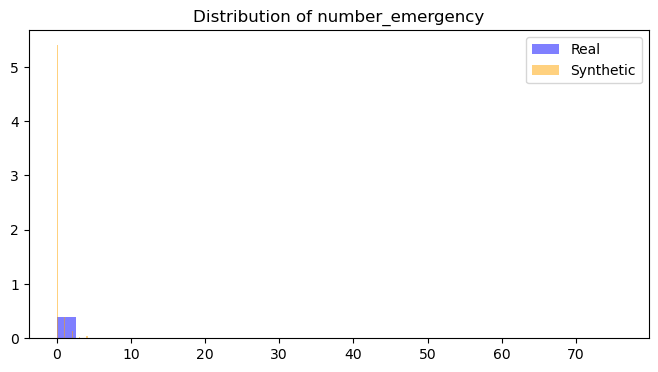

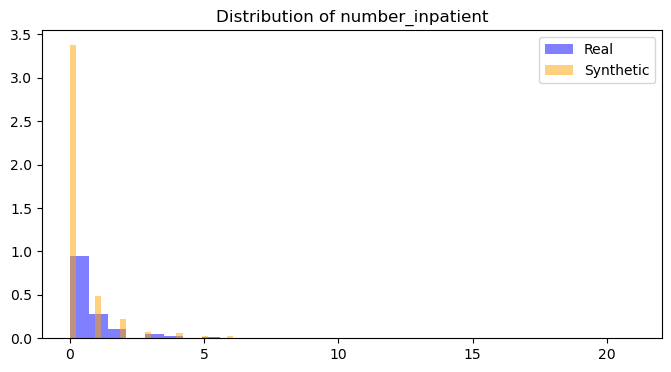

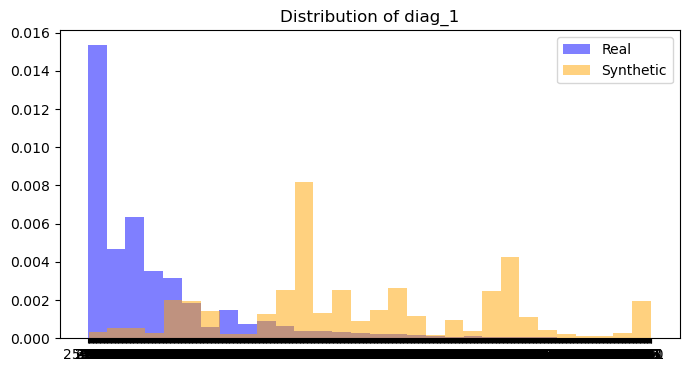

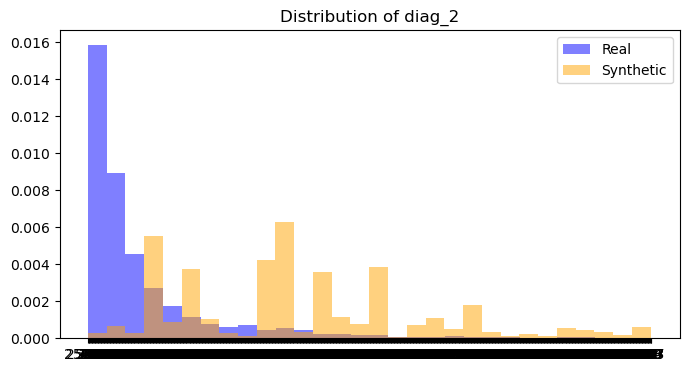

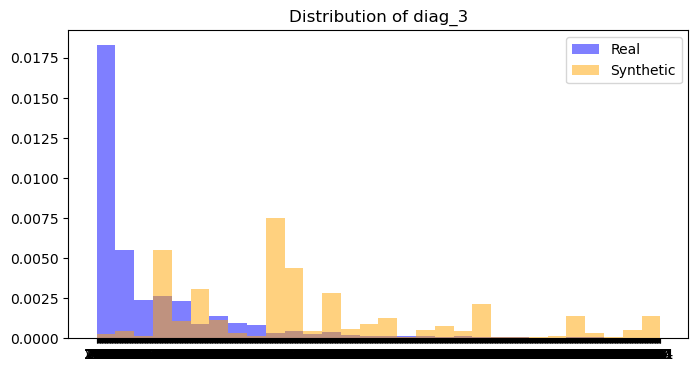

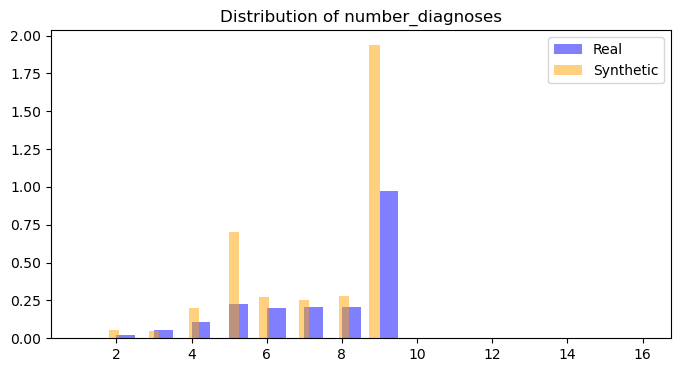

TypeError: 'value' must be an instance of str or bytes, not a float

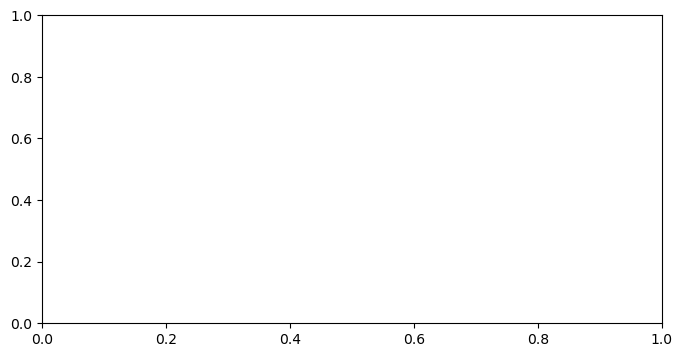

In [12]:
import matplotlib.pyplot as plt

numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(original_data[col], bins=30, alpha=0.5, label='Real', color='blue', density=True)
    plt.hist(synthetic_data[col], bins=30, alpha=0.5, label='Synthetic', color='orange', density=True)
    plt.title(f"Distribution of {col}")
    plt.legend()
    plt.show()
    

In [2]:
from sdv import DPCTGAN  # Differentially Private CTGAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load your dataset
original_data = pd.read_csv('diabetic_data.csv')

# Preprocessing
data = original_data.drop(columns=["encounter_id", "patient_nbr"])
categorical_columns = data.select_dtypes(include=["object"]).columns
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])

# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Train a Differentially Private CTGAN
dp_ctgan = DPCTGAN(
    epochs=50,                # Number of training epochs
    epsilon=1.0,              # Differential privacy parameter
    batch_size=500,           # Training batch size
    verbose=True              # Display training progress
)
dp_ctgan.fit(train_data, discrete_columns=list(categorical_columns))

# Generate synthetic data
dp_synthetic_data = dp_ctgan.sample(len(test_data))

# Membership Inference Attack
# Create labels for membership: 1 for training data, 0 for synthetic
train_data["membership"] = 1
dp_synthetic_data["membership"] = 0

# Combine and shuffle
combined_data_dp = pd.concat([train_data, dp_synthetic_data]).sample(frac=1, random_state=42)
X_dp = combined_data_dp.drop(columns=["membership"])
y_dp = combined_data_dp["membership"]

# Split for attack model
X_train_dp, X_attack_dp, y_train_dp, y_attack_dp = train_test_split(X_dp, y_dp, test_size=0.3, random_state=42)

# Train a simple attack model
dp_attack_model = RandomForestClassifier(random_state=42)
dp_attack_model.fit(X_train_dp, y_train_dp)

# Evaluate the attack
dp_y_pred = dp_attack_model.predict(X_attack_dp)
dp_attack_results = {
    "accuracy": accuracy_score(y_attack_dp, dp_y_pred),
    "precision": precision_score(y_attack_dp, dp_y_pred),
    "recall": recall_score(y_attack_dp, dp_y_pred)
}

print("Attack Results (DP CTGAN):", dp_attack_results)


ImportError: cannot import name 'DPCTGAN' from 'sdv' (/opt/anaconda3/lib/python3.12/site-packages/sdv/__init__.py)

In [3]:
pip install sdv

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Fairness
def evaluate_fairness(real_df, synth_df, sensitive_attr, outcome):
    """
    Assess fairness by comparing the outcome distributions between real and synthetic data
    across groups defined by a sensitive attribute.
    For each group, we compute the Jensen–Shannon Divergence (JSD) between the normalized distributions.
    
    Parameters:
      real_df: DataFrame of real data
      synth_df: DataFrame of synthetic data
      sensitive_attr: Column name for the sensitive attribute (e.g., 'gender')
      outcome: Column name for the outcome variable (e.g., 'income' or a decision variable)
    
    Returns:
      A dictionary mapping each group to its JSD score.
    """
    fairness_results = {}
    groups = real_df[sensitive_attr].unique()
    for group in groups:
        # Filter data for the current group.
        real_group = real_df[real_df[sensitive_attr] == group][outcome]
        synth_group = synth_df[synth_df[sensitive_attr] == group][outcome]
        
        # Get probability distributions (here, using value counts normalized to probabilities)
        real_dist = real_group.value_counts(normalize=True).sort_index()
        synth_dist = synth_group.value_counts(normalize=True).sort_index()
        
        # Align the indices (all possible outcome values)
        all_outcomes = sorted(set(real_dist.index).union(set(synth_dist.index)))
        real_probs = real_dist.reindex(all_outcomes, fill_value=0).values
        synth_probs = synth_dist.reindex(all_outcomes, fill_value=0).values
        
        # Compute the Jensen–Shannon Divergence.
        jsd_score = jensenshannon(real_probs, synth_probs, base=2)
        fairness_results[group] = jsd_score
    
    return fairness_results

# Specify the sensitive attribute and outcome variable (update these as per your dataset).
sensitive_attribute = "gender"    # example sensitive attribute
outcome_variable = "income"       # example outcome variable

fairness_results = evaluate_fairness(original_data, synthetic_data, sensitive_attribute, outcome_variable)
print("\nFairness Evaluation (JSD) Results:")
print(fairness_results)


NameError: name 'original_data' is not defined